In [1]:
import tvpp
import numpy as np
import matplotlib.pyplot as plt

In [13]:
dof = 6
ts = 0.001
vmax = np.zeros(dof) # rad/s
DEG2RAD = np.pi / 180.0
vmax[0] = 262.5 * DEG2RAD
vmax[1] = 240.0 * DEG2RAD
vmax[2] = 300.0 * DEG2RAD
vmax[3] = 300.0 * DEG2RAD
vmax[4] = 300.0 * DEG2RAD
vmax[5] = 480.0 * DEG2RAD

amax = np.zeros(dof) # rad/s^2
amax[0] = 1400.0 * DEG2RAD
amax[1] = 900.0 * DEG2RAD
amax[2] = 1300.0 * DEG2RAD
amax[3] = 1800.0 * DEG2RAD
amax[4] = 1600.0 * DEG2RAD
amax[5] = 5000.0 * DEG2RAD

_tvpp = tvpp.TrapezoidalVelocityProfilePlanner(dof, ts, vmax, amax)

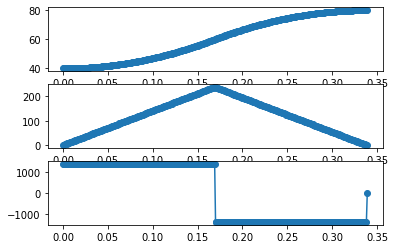

In [14]:
# example 1: single-axis single-motion TVPP
q0 = 40.0 * DEG2RAD
qn = 80.0 * DEG2RAD
tdata, qdata, vdata, adata = _tvpp.getSingleAxisSingleMotionProfile(0, q0, qn)
qdata = np.array(qdata) / DEG2RAD
vdata = np.array(vdata) / DEG2RAD
adata = np.array(adata) / DEG2RAD

plt.figure()
plt.subplot(3, 1, 1)
plt.plot(tdata, qdata, '-o')
plt.subplot(3, 1, 2)
plt.plot(tdata, vdata, '-o')
plt.subplot(3, 1, 3)
plt.plot(tdata, adata, '-o')
plt.show()

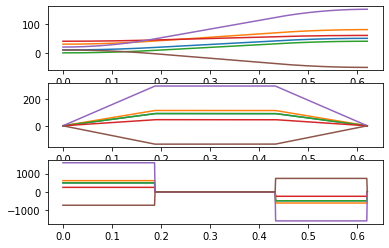

In [15]:
# example 2: multi-axis single-motion TVPP
q0 = [0, 0, 0, 0, 0, 0]
qn = [0, 0, 0, 0, 0, 0]
q0[0] = 10.0 * DEG2RAD
q0[1] = 30.0 * DEG2RAD
q0[2] = 0.0 * DEG2RAD
q0[3] = 40.0 * DEG2RAD
q0[4] = 20.0 * DEG2RAD
q0[5] = 10.0 * DEG2RAD

qn[0] = 50.0 * DEG2RAD
qn[1] = 80.0 * DEG2RAD
qn[2] = 40.0 * DEG2RAD
qn[3] = 60.0 * DEG2RAD
qn[4] = 150.0 * DEG2RAD
qn[5] = -50.0 * DEG2RAD

tdata, qdata, vdata, adata = _tvpp.getMultiAxisSingleMotionProfile(q0, qn)

qdata = np.array(qdata) / DEG2RAD
vdata = np.array(vdata) / DEG2RAD
adata = np.array(adata) / DEG2RAD

plt.figure()
plt.subplot(3, 1, 1)
for i in range(dof):
    plt.plot(tdata, qdata[i])

plt.subplot(3, 1, 2)
for i in range(dof):
    plt.plot(tdata, vdata[i])

plt.subplot(3, 1, 3)
for i in range(dof):
    plt.plot(tdata, adata[i])

plt.show()